# Section 1: Business  understanding

## how likely will student go to college if his parents went to college ?

## what is type of school accreditation have higher rate of entering college ?

## how does average grades effect ablity to go to college ?

## can we predect if student will go to college ?

# Section 2: Data understanding 

In [18]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Access

In [19]:
# loading data
go_to_school = pd.read_csv(r'C:\Users\waleed\Desktop\data.csv')
go_to_school.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


### Analyze

### how many record do we have dataset ?

In [20]:
go_to_school.shape[0]

1000

1000 record 

### let’s see how many student parent went to college  

In [21]:
go_to_school['parent_was_in_college'].value_counts()

True     520
False    480
Name: parent_was_in_college, dtype: int64

520 parent went to college and 480 did not go to college

### how many student got accepted in college

In [22]:
go_to_school['will_go_to_college'].value_counts()

True     500
False    500
Name: will_go_to_college, dtype: int64

500 student got accepted in college

### how many student go accepted in college and their parent went to college

In [23]:
accepted_student_parent=go_to_school.groupby(['parent_was_in_college']).sum()['will_go_to_college']
accepted_student_parent

parent_was_in_college
False    228.0
True     272.0
Name: will_go_to_college, dtype: float64

272 student got accepted and their parent went to college to  and 228 student got accepted and their parent did not go to college 

### How many student have school accreditation of type A and how many student have school accreditation of type B 

In [24]:
go_to_school['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

481 student have school accreditation of type A and 519 student have school accreditation of type B

### for each school accreditation how many student got accepted 

In [25]:
accepted_student_school_accreditation= go_to_school.groupby('school_accreditation').sum()['will_go_to_college']
accepted_student_school_accreditation

school_accreditation
A    248.0
B    252.0
Name: will_go_to_college, dtype: float64

school accreditation of type A have 248 student got accepted 


school accreditation of type B have 252 student got accepted 

### What is the average grades of students  

In [26]:
go_to_school['average_grades'].mean()

86.09719999999999

the average grades of all students is 86.09

### what is the lowest average grade student who got accepted 

In [27]:
go_to_school.loc[go_to_school['will_go_to_college']==True]['average_grades'].min()

75.0

The average grade lowest is 75 

### What is the average grades of student who got accepted and who didn't accepted 

In [28]:
averageGradesOfStudent=go_to_school.groupby('will_go_to_college').mean()['average_grades']

the average grades of student who got accepted is 87.80 and  the average grades of student who didn’t  got accepted is 84.39 , this is show us that average grades play critical role in determine if student will go to college or not 


# Section 3 : Data Preparation

### clean

In [29]:
def replace_Categorical_data(datafram , To_replace  , new_value):
    '''
        replace Categorical data to new value 
        
        input: 
              datafram   :  datafram that want to replace 
              To_replace :  Categorical value
              new_value  :  new value to be replaced to 
        output:
              datafram   : new dataframe with replaced value
    ''' 
    return datafram.replace(to_replace=To_replace ,value=new_value)
    
    
    

replacing categorical value with integer 

In [30]:
go_to_school=replace_Categorical_data(go_to_school ,'Academic',1)
go_to_school=replace_Categorical_data(go_to_school ,'Vocational',0)
go_to_school=replace_Categorical_data(go_to_school ,'A',1)
go_to_school=replace_Categorical_data(go_to_school ,'B',0)
go_to_school=replace_Categorical_data(go_to_school ,'Male',1)
go_to_school=replace_Categorical_data(go_to_school ,'Female',0)
go_to_school=replace_Categorical_data(go_to_school ,'Very Interested',2)
go_to_school=replace_Categorical_data(go_to_school ,'Interested',1)
go_to_school=replace_Categorical_data(go_to_school ,'Uncertain',0)
go_to_school=replace_Categorical_data(go_to_school ,'Less Interested',-1)
go_to_school=replace_Categorical_data(go_to_school ,'Not Interested',-2)
go_to_school=replace_Categorical_data(go_to_school ,'Urban',1)
go_to_school=replace_Categorical_data(go_to_school ,'Rural',0)
go_to_school=go_to_school.astype(int)


spliting dependent variables and independent variables

In [31]:
xData=go_to_school.iloc[:,:-1]
yData=go_to_school.iloc[:,-1]

# Section 4 : Data Modeling

### model

spliting data into trining and testing

In [32]:
trainX ,testx ,trainY ,testY =train_test_split(xData ,yData,test_size=0.25,random_state=10)

defining linear model


In [33]:
model=LinearRegression(normalize=True)

trining linear model with trining data

In [34]:
model.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Predicting whether  student will go to college or not using test data 

In [35]:
Ypredected=model.predict(testx)

Testing model accuracy comparing to testing data

In [36]:
r2_score(testY,Ypredected)

0.5703867290351483

# Section 5 : Evaluate the Results

## how likely will student go to college if his parents went to college ?

<BarContainer object of 2 artists>

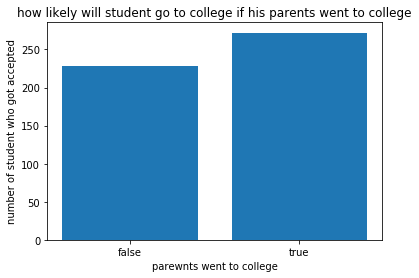

In [37]:

fig, ax = plt.subplots()
ax.set_xlabel('parewnts went to college')
ax.set_ylabel('number of student who got accepted')
ax.set_title('how likely will student go to college if his parents went to college')
ax.bar(['false','true'],accepted_student_parent)

Number of student who got accepted in college and their parent went to college to is 272 student and number of student who got accepted in college and their parent didn’t  went to college is 282 student   if parent went to college they will have higher knowledge of importance of college and will increase student chance to enter college 

## what is type of school accreditation have higher rate of entering college ?

([<matplotlib.patches.Wedge at 0x21f0c06d888>,
 [Text(-1.0999131482721833, 0.013822671882601915, 'A'),
  Text(1.0999131482721833, -0.01382267188260205, 'B')],
 [Text(-0.5999526263302818, 0.0075396392086919525, '49.6%'),
  Text(0.5999526263302818, -0.007539639208692026, '50.4%')])

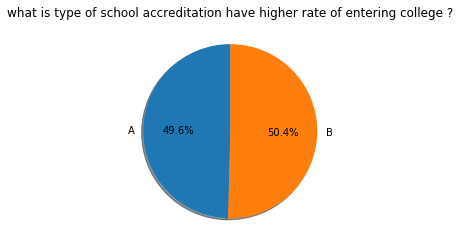

In [38]:
fig, ax = plt.subplots()
ax.set_title('what is type of school accreditation have higher rate of entering college ?')
ax.pie([49.6,50.4],labels=['A','B'], shadow=True,startangle=90, autopct='%1.1f%%')

50.4% of student who got accepted from school accreditation of type B and 49.6% from school accreditation of type A , although that  school accreditation of type B have higher rate in entering college then A but the difference is so small that we can not make decision in which type of school accreditation have higher rate of entering college 

## how does average grades effect ablity to go to college ?

<BarContainer object of 2 artists>

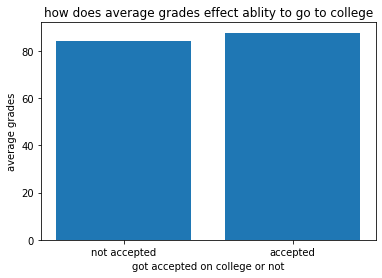

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel('got accepted on college or not')
ax.set_ylabel('average grades')
ax.set_title('how does average grades effect ablity to go to college')
ax.bar(['not accepted','accepted'],averageGradesOfStudent)

the average grades of student who got accepted is 87.80 and  the average grades of student who didn’t  got accepted is 84.39 , this is show us that average grades play critical role in determine if student will go to college or not 